In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

In [100]:
data = pd.merge(mouse_metadata,study_results, on="Mouse ID", how='inner')
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
druggb= data.groupby(["Drug Regimen"])
meantumorvolume = druggb["Tumor Volume (mm3)"].mean()
mediantumorvolume = druggb["Tumor Volume (mm3)"].median()
variancetumorvolume = druggb["Tumor Volume (mm3)"].var()
stddevtumorvolume = druggb["Tumor Volume (mm3)"].std()
stderrtumorvolume = druggb["Tumor Volume (mm3)"].sem()

summarystatisticsdf = pd.DataFrame({"Mean Tumor Volume": meantumorvolume, "Median Tumor Volume": mediantumorvolume, "Tumor Volume Variance": variancetumorvolume, "Tumor Volume Std. Dev.": stddevtumorvolume, "Tumor Volume Std. Err.": stderrtumorvolume})
summarystatisticsdf

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [102]:
drugtypecount = data["Drug Regimen"].value_counts()
drugtypecount
x_axis = np.arange(len(drugtypecount))
drugtypecount

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

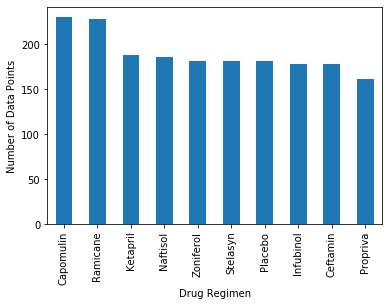

In [103]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
barplotpandas = drugtypecount.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

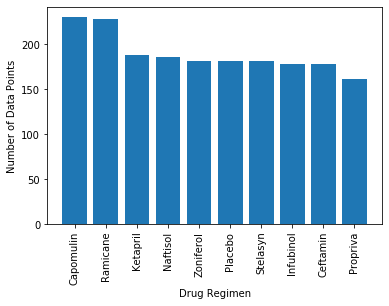

In [104]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(x_axis, drugtypecount)
tick_locations = [value for value in x_axis]
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(tick_locations, ["Capomulin", "Ramicane","Ketapril","Naftisol","Zoniferol","Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva" ], rotation=90)
plt.show()

In [105]:
sexcountsgroupby = data.groupby(["Mouse ID"])
sexcountsgroupby

In [106]:
malecount = sexcountsgroupby["Sex"].unique()
piecounts = malecount.value_counts()
piecounts

[Male]      125
[Female]    124
Name: Sex, dtype: int64

In [107]:
sexcountdf = pd.DataFrame({piecounts[0], piecounts[1]})
sexcountdf

,0
0,124
1,125


In [108]:
sexcountdf.iloc[1:2]

,0
1,125


In [109]:
sexcount = [sexcountdf.iloc[0:1], sexcountdf.iloc[1:2]]
labels = ["Male", "Female"]
colors = ["tab:blue", "tab:orange"]
          

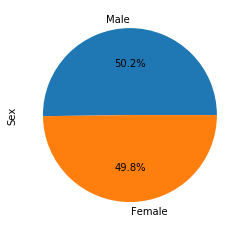

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pandaspie = piecounts.plot(kind="pie", labels=labels,autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

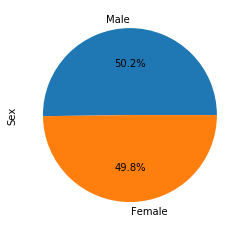

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(piecounts,colors=colors,labels=labels,autopct="%1.1f%%" )
plt.ylabel("Sex")

In [112]:
# Calculate the final tumor volume of each mouse. 
max_tumor = data.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
max_tumor.head(40)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
5,a401,Zoniferol,Female,8,25,45,66.794156,4
6,a411,Ramicane,Male,3,22,45,45.466677,1
7,a444,Ramicane,Female,10,25,45,45.000000,0
8,a457,Ketapril,Female,11,30,10,49.783419,0
9,a492,Stelasyn,Male,20,25,45,60.122011,1


In [113]:
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(data,on=['Mouse ID','Timepoint'],how="left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [114]:
# Calculate the final tumor volume of each mouse in Capomulin treatment regime. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
capomulin

cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_quartiles = round(cap_quartiles, 2)
cap_lowerq = cap_quartiles[0.25]
cap_lowerq = round(cap_lowerq, 2)
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq
cap_iqr = round(cap_iqr, 2)
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
cap_median = capomulin.median()
cap_median = round(cap_median,2)
print(f"The lower quartile of occupancy is: {cap_lowerq}")
print(f"The upper quartile of occupancy is: {cap_upperq}")
print(f"The interquartile range of occupancy is: {cap_iqr}")
print(f"The median of occupancy is {cap_median}")
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")


The lower quartile of occupancy is: 32.38
The upper quartile of occupancy is: 40.16
The interquartile range of occupancy is: 7.78
The median of occupancy is 38.13
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [115]:
capomulintable = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
mousegroupby = capomulintable.groupby(["Mouse ID"])
mousegbweight = mousegroupby["Weight (g)"].mean()
mousegbweight

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64

In [116]:
mousegbtumorvolume = mousegroupby["Tumor Volume (mm3)"].mean()
mousegbtumorvolume

Mouse ID
b128    38.982878
b742    38.939633
f966    30.485985
g288    37.074024
g316    40.159220
i557    47.685963
i738    37.311846
j119    38.125164
j246    38.753265
l509    41.483008
l897    38.846876
m601    28.430964
m957    33.329098
r157    46.539206
r554    32.377357
r944    41.581521
s185    23.343598
s710    40.728578
t565    34.455298
u364    31.023923
v923    40.658124
w150    39.952347
w914    36.041047
x401    28.484033
y793    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [117]:
capomulinavgtumorvolumemm3 = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
capomulinavgtumorvolumemm3



19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [118]:
averagetumorvolume = data[data["Drug Regimen"] == "Capomulin"]
atvgroupby = averagetumorvolume.groupby(["Mouse ID"])
# averagetumorvolumecap = atvgroupby.loc[atvgroupby["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
# averagetumorvolumecap
finalatv = atvgroupby["Tumor Volume (mm3)"].mean()
finalatv

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [119]:
# Calculate the final tumor volume of each mouse in Ramicane treatment regime. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
ramicane

ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_quartiles = round(ram_quartiles, 2)
ram_lowerq = ram_quartiles[0.25]
ram_lowerq = round(ram_lowerq, 2)
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq
ram_iqr = round(ram_iqr, 2)
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
ram_upper_bound = round(ram_upper_bound, 2)
ram_median = ramicane.median()
ram_median = round(ram_median,2)
print(f"The lower quartile of occupancy is: {ram_lowerq}")
print(f"The upper quartile of occupancy is: {ram_upperq}")
print(f"The interquartile range of occupancy is: {ram_iqr}")
print(f"The median of occupancy is {ram_median}")
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")
print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)]}")


The lower quartile of occupancy is: 31.56
The upper quartile of occupancy is: 40.66
The interquartile range of occupancy is: 9.1
The median of occupancy is 36.56
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [120]:
# Calculate the final tumor volume of each mouse in Infubinol treatment regime. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
infubinol

inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_quartiles = round(inf_quartiles, 2)
inf_lowerq = inf_quartiles[0.25]
inf_lowerq = round(inf_lowerq, 2)
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq - inf_lowerq
inf_iqr = round(inf_iqr, 2)
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
inf_upper_bound = round(inf_upper_bound, 2)
inf_median = infubinol.median()
inf_median = round(inf_median,2)
print(f"The lower quartile of occupancy is: {inf_lowerq}")
print(f"The upper quartile of occupancy is: {inf_upperq}")
print(f"The interquartile range of occupancy is: {inf_iqr}")
print(f"The median of occupancy is {inf_median}")
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")
print(f"Infubinol potential outliers: {infubinol.loc[(infubinol < inf_lower_bound) | (infubinol > inf_upper_bound)]}")

The lower quartile of occupancy is: 54.05
The upper quartile of occupancy is: 65.53
The interquartile range of occupancy is: 11.48
The median of occupancy is 60.17
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [121]:
# Calculate the final tumor volume of each mouse in Ceftamin treatment regime. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
ceftamin

cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_quartiles = round(cef_quartiles, 2)
cef_lowerq = cef_quartiles[0.25]
cef_lowerq = round(cef_lowerq, 2)
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq - cef_lowerq
cef_iqr = round(cef_iqr, 2)
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_lower_bound = round(cef_lower_bound,2)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
cef_upper_bound = round(cef_upper_bound, 2)
cef_median = ceftamin.median()
cef_median = round(cef_median,2)
print(f"The lower quartile of occupancy is: {cef_lowerq}")
print(f"The upper quartile of occupancy is: {cef_upperq}")
print(f"The interquartile range of occupancy is: {cef_iqr}")
print(f"The median of occupancy is {cef_median}")
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")
print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin > cef_upper_bound)]}")


The lower quartile of occupancy is: 48.72
The upper quartile of occupancy is: 64.3
The interquartile range of occupancy is: 15.58
The median of occupancy is 59.85
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


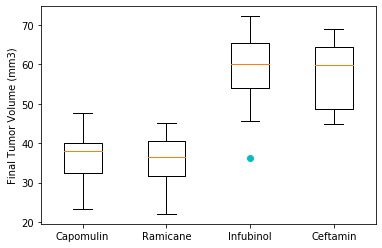

In [122]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
regimens = [capomulin,ramicane,infubinol,ceftamin]
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")

ax1.boxplot(regimens,sym="co")
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

In [123]:
capomulintest = merged_data.loc[merged_data["Drug Regimen"] == "capomulin"]["Mouse ID"]
capomulintest

Series([], Name: Mouse ID, dtype: object)

In [124]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulintumor = data.loc[data["Mouse ID"] == "b128"]["Tumor Volume (mm3)"]
capomulintumor

300    45.000000
301    45.651331
302    43.270852
303    43.784893
304    42.731552
305    43.262145
306    40.605335
307    37.967644
308    38.379726
309    38.982878
Name: Tumor Volume (mm3), dtype: float64

In [125]:
capomulintime = data.loc[data["Mouse ID"] == "b128"]["Timepoint"]
capomulintime

300     0
301     5
302    10
303    15
304    20
305    25
306    30
307    35
308    40
309    45
Name: Timepoint, dtype: int64

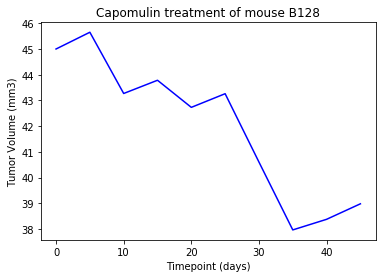

In [126]:
capumulinline = plt.plot(capomulintime,capomulintumor,color="blue" )
plt.title("Capomulin treatment of mouse B128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

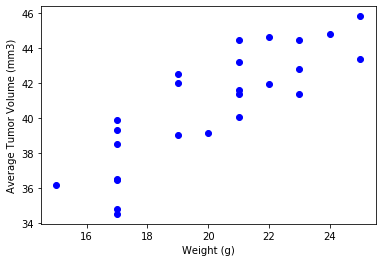

In [127]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(mousegbweight,finalatv, facecolors ="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

The correlation between mouse weight and the average tumor volume is 0.84


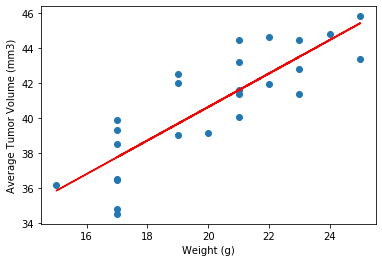

In [130]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mousegbweight
y_values = finalatv
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
correlation = st.pearsonr(mousegbweight,finalatv)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")